<div style="text-align: center;">
<h1>Assignment 3: Block Ciphers</font></h1>
<h2>Course: Elements of Applied Data Security</font></h2>

<center><img src="../images/unibo.png" alt="unibo_logo" width="200"/></center>

<h3>Professor: Alex Marchioni and Livia Manovi</font></h3>
<h3>University: Università degli Studi di Bologna</font></h3>
<h3>Author: Lluis Barca Pons</font></h3>
<h3>Date: 2024-05-07</font></h3>
</div>

## Importing libraries

In [89]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad

from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np
import io


# Part 1: Advanced Encryption Standard (AES)

## Input data

First we will plot the original image in order to see how it looks like.

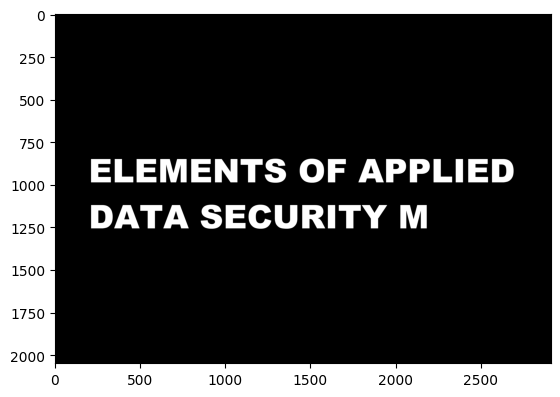

In [90]:
image = imread('../images/image.png').mean(axis=-1)

# Plot the original image
plt.imshow(image, cmap='gray')
plt.show()

Now we will convert this image in a numpy matrix array in order to be able to manipulate it.

In [91]:
image = (255 * image).astype(np.uint8)
print(image.shape)

(2048, 2912)


In [92]:
image_data = image.tobytes()
print(len(image_data))

5963776


Key and IV generation

In [93]:
key = get_random_bytes(16)
iv = get_random_bytes(16)

In [94]:
def display_cipher_image(cipher_data, shape):
    cipher_image = np.frombuffer(cipher_data, dtype=np.uint8).reshape(shape)
    plt.imshow(cipher_image, cmap='gray')
    plt.show()

### Encryption using ECB mode

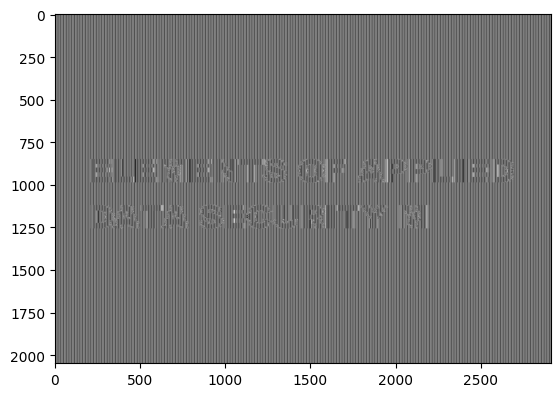

In [95]:
ecb = AES.new(key, AES.MODE_ECB)
encrypted_ecb = ecb.encrypt(image_data)
display_cipher_image(encrypted_ecb, image.shape)

### Encryption using CBC mode

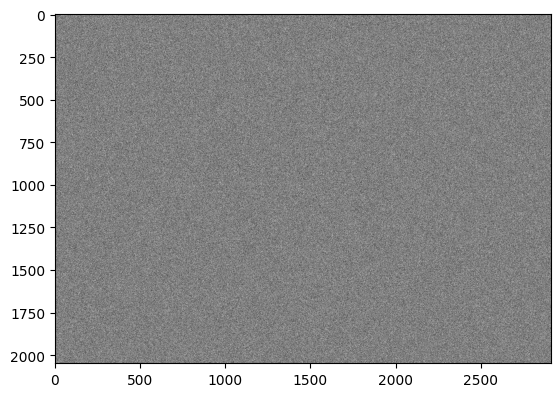

In [96]:
cbc = AES.new(key, AES.MODE_CBC, iv=iv)
encrypted_cbc = cbc.encrypt(image_data)
display_cipher_image(encrypted_cbc, image.shape)

### Encryption using CFB mode

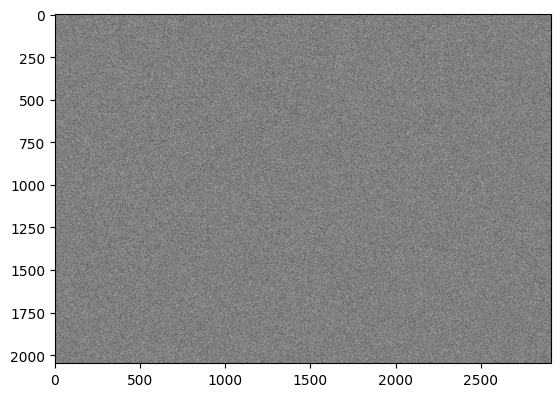

In [97]:
cfb = AES.new(key, AES.MODE_CFB, iv=iv)
encrypted_cfb = cfb.encrypt(image_data)
display_cipher_image(encrypted_cfb, image.shape)

### Encryption using CTR mode

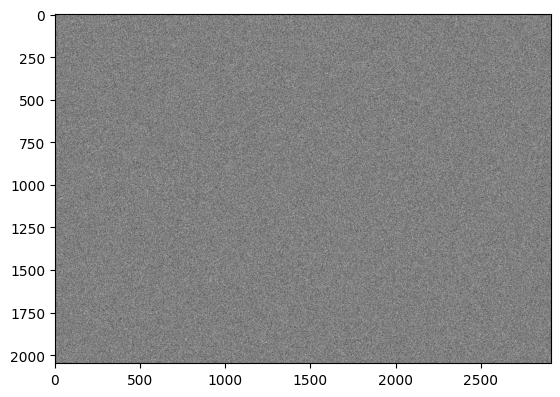

In [98]:
# CTR mode requires a nonce of 8 bytes because the block size is 16 bytes
ctr = AES.new(key, AES.MODE_CTR, nonce=get_random_bytes(8))
encrypted_ctr = ctr.encrypt(image_data)
display_cipher_image(encrypted_ctr, image.shape)

## Conclusion

From these results, we can readily appreciate the effectiveness of the various encryption modes. The last three modes appear to be quite effective for image processing, as the original plaintext image becomes unrecognizable; however, the first mode, the Electronic Codebook (ECB), is less effective compared to the others, as the text present in the unencrypted image is still discernible.

# Part 2: Monte Carlo Simulations

Monte Carlo simulations offer a fascinating approach to estimate the value of \(\pi\), the mathematical constant pivotal in geometry and science. This method leverages randomness and statistical principles, employing a simple yet effective visual experiment. By plotting random points within a square that encloses a quarter-circle, one can approximate \(\pi\) based on the proportion of points that fall inside the circle compared to the total number inside the square. The accuracy of the approximation improves with the number of points used, demonstrating the power of probabilistic techniques in solving problems that are analytically complex or intractable. This approach not only illustrates the concept of \(\pi\) but also introduces fundamental ideas in probability and statistical inference.

First of all we will create the method to make the Monte Carlo simulation:

In [99]:
def monte_carlo_pi(n):
    """ Estimate the value of Pi using the Monte Carlo method with n points

    Args:
        n: number of points to use in the estimation

    Returns:
        pi: the estimated value of Pi as a float
    """

    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    return 4 * np.sum(x**2 + y**2 <= 1) / n


Now we will run the simulation to see the plot of 10000 points and the approximation of $\pi$.

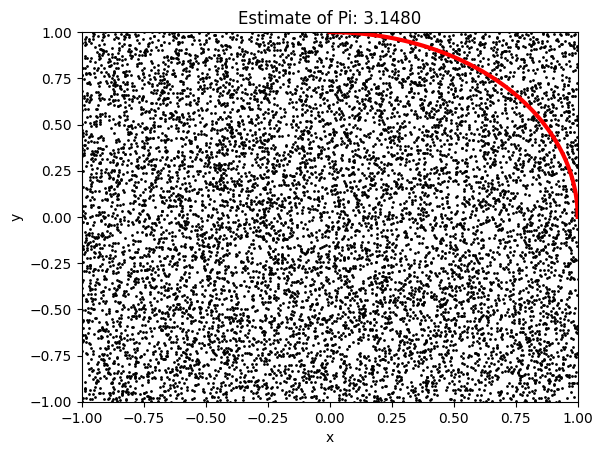

In [100]:
# Generate random points and plot them
num_samples = 10000
x = np.random.uniform(-1, 1, num_samples)
y = np.random.uniform(-1, 1, num_samples)
plt.plot(x, y, 'k.', markersize=2)

# Plot the quarter circle of radius 1
t = np.linspace(0, np.pi/2, 100)
xc = np.cos(t)
yc = np.sin(t)
plt.plot(xc, yc, 'r-', linewidth=3)

# Set the axis limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('y')

# Show the plot and the estimated value of pi
plt.title('Estimate of Pi: {:.4f}'.format(monte_carlo_pi(num_samples)))
plt.show()

Now we plot the estimation of $\pi$ as a function of the number of points used in the simulation. We will use a logarithmic scale to better visualize the convergence of the approximation and the decreasing error as the number of points increases.

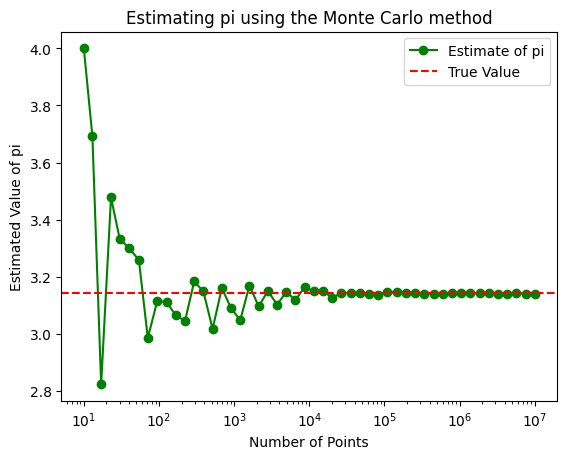

In [101]:
# Generate a list of sample sizes
sample_sizes = np.logspace(1, 7, num=50, dtype=int)

# Generate a list of estimates of pi for each sample size
pi_estimates = [monte_carlo_pi(n) for n in sample_sizes]

# Plot how the estimate of pi converges to the true value as more points are generated
fig, ax = plt.subplots()
ax.plot(sample_sizes, pi_estimates, 'o-', color='green', label='Estimate of Pi')
ax.axhline(np.pi, color='r', linestyle='--', label='True Value')
ax.set_xscale('log')
ax.set_xlabel('Number of Points')
ax.set_ylabel('Estimated Value of Pi')
ax.set_title('Estimating Pi using the Monte Carlo method')
ax.legend()
plt.show()

Also, we plot the error of the approximation:

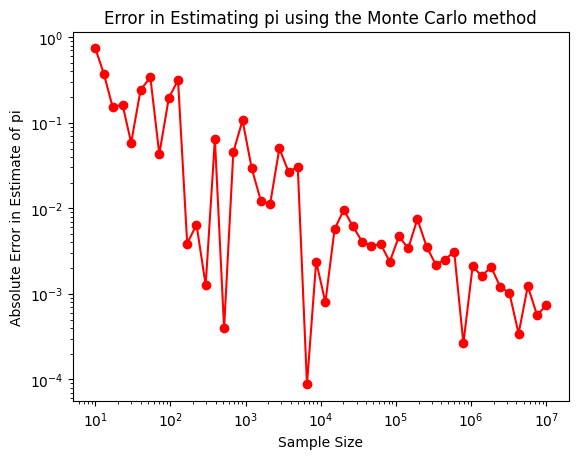

In [102]:
# Generate a list of sample sizes
sample_sizes = np.logspace(1, 7, num=50, dtype=int)

# Generate a list of estimates of pi for each sample size
pi_estimates = np.array([monte_carlo_pi(n) for n in sample_sizes])

# Calculate the absolute error in the estimate of pi for each sample size
pi_errors = np.abs(pi_estimates - np.pi)

# Plot the relationship between the error and the sample size
fig, ax = plt.subplots()
ax.plot(sample_sizes, pi_errors, 'o-', color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Absolute Error in Estimate of Pi')
ax.set_title('Error in Estimating Pi using the Monte Carlo method')
plt.show()

In conclusion, Monte Carlo method is an effective statistical tool capable of estimating pi with considerable precision. This technique involves creating random points and determining the ratio of those that land inside a circle versus those that fall outside. From this ratio, we can derive an estimate for pi. The accuracy of this estimate improves as more points are generated.

# Part 3: Diffusion and Confusion with AES